# Databases - Grouping

## Aggregaten

1.  `SUM`
2.  `AVG`
3.  `MIN`
4.  `MAX`
5.  `COUNT`

# Sum

### **Voorbeeld**

Geef de totale stockwaarde.

In [ ]:
SELECT SUM(UnitsInStock * UnitPrice) AS InventoryValue 
FROM products

# Avg

### **Voorbeeld**

Wat is het gemiddeld aantal producten in stock?

In [ ]:
SELECT AVG(unitsinstock) AS AverageStock
FROM products

# Count

### **Voorbeeld**

Tel het aantal producten (dit is het aantal rijen)

In [ ]:
SELECT COUNT(*) AS Aantal
FROM products

### **Voorbeeld**

Tel het aantal NIET NULL waarden in de kolom categoryid.

In [ ]:
SELECT COUNT(CategoryId) AS CategoryCount
FROM products

### **Voorbeeld**

Tel het aantal verschillende NIET NULL categorieën (catergoryid) in products.

In [ ]:
SELECT COUNT(DISTINCT CategoryId) AS CategoryCount
FROM products

# Min & Max

### **Voorbeeld**

Wat is het goedkoopste en het duurste product?

In [ ]:
SELECT
 MIN(unitprice) AS Minimum
,MAX(unitprice) AS Maximum
FROM products


## Ola pola

```
Omdat een statistische functie maar 1 antwoord oplevert, moeten ofwel alle uitdrukkingen in de SELECT clausule een statistische functie bevatten, ofwel geen enkele!

Statistische functies houden geen rekening met NULL waarden.
    Uitzondering : COUNT(*) (telt ook rijen die null waarden bevatten)
```

# Group By

### **Voorbeeld**

Toon <mark>per categorie</mark> het aantal producten.

In [ ]:
SELECT 
 CategoryID
,COUNT(ProductId) AS Aantal
FROM Products
GROUP BY CategoryID

### **Voorbeeld**

Geef alle unieke categorien die gebruikt worden voor `producten`.

In [ ]:
SELECT CategoryId
FROM Products
GROUP BY CategoryId

Geef alle unieke categorien die gebruikt worden voor `producten`. (via `DISTINCT`)

In [ ]:
SELECT DISTINCT CategoryId
FROM Products
GROUP BY CategoryId

### **Voorbeeld**

Toon per categorie het aantal producten, waarvan er meer dan 10 in stock zijn.

In [ ]:
SELECT 
 CategoryID
,COUNT(ProductId) AS Aantal
FROM Products
WHERE UnitsInStock > 10
GROUP BY CategoryID

## Ola Pola

```
- Elke groep is een afzonderlijke verzameling waarop eventueel statistische bewerkingen (functies) uitgevoerd kunnen worden. 
- De kolomnamen, vermeld in de GROUP BY clausule, mogen nu ook samen met de statistische functies in de SELECT clausule voorkomen. 
```

## Having

### **Voorbeeld**

Toon per categorie die meer dan 10 producten bevat, het aantal producten

In [ ]:
SELECT 
 CategoryId
,COUNT(ProductId) AS Aantal
FROM Products
GROUP BY CategoryId
HAVING COUNT(ProductId) > 10

### **Voorbeeld**

Toon per categorie die meer dan 10 producten bevat, waarvan er meer dan 10 in stock zijn, het aantal producten

In [ ]:
SELECT 
 CategoryId
,COUNT(ProductId) as Aantal
FROM Products
WHERE UnitsInStock >10
GROUP BY CategoryId
HAVING COUNT(ProductId) > 10

## Ola Pola

-   `WHERE` heeft betrekking op rijen
-   `HAVING` heeft betrekking op groepen
-   Statistische functies enkel gebruiken in `SELECT`, `HAVING`, `ORDER BY` niet in `WHERE` of `GROUP BY`.
-   **You're gonna have a bad time...**

In [ ]:
SELECT 
 categoryID
,MIN(unitprice) AS Minimum 
FROM products

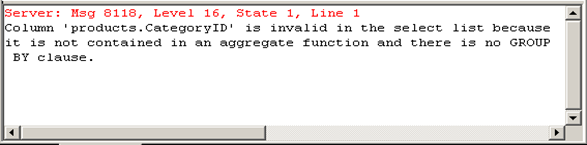

## Hammer time

### Werknemers

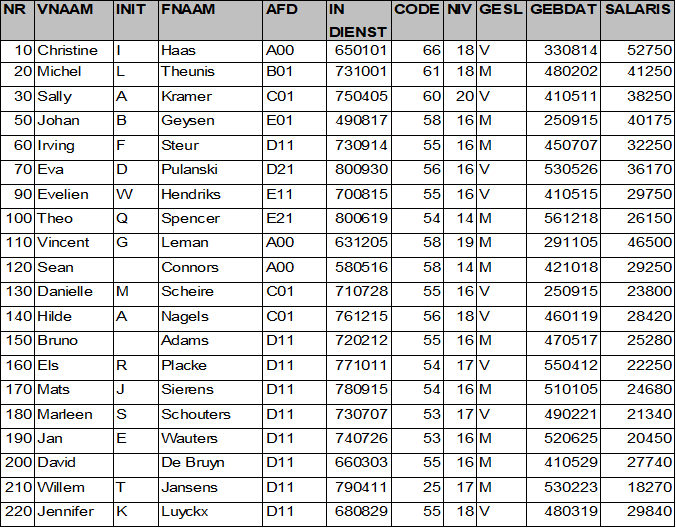

### Afdeling

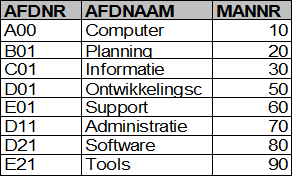

1. Tel het aantal werknemers uit de afdeling D11 en geef het maximum, minimum en gemiddeld salaris voor deze afdeling, alsook het aantal verschillende jobcodes uit deze afdeling. Geef ook de som van alle lonen betaald in afdeling D11.

In [ ]:
SELECT 
 COUNT(*)
,MAX(Salaris)
,MIN(Salaris)
,AVG(Salaris)
,SUM(Salaris)
,COUNT(distinct code) 
FROM Wrknemer 
WHERE Afd = 'D11'

2\. Geef per afdeling, het afdnr en het aantal werknemers, gesorteerd volgens afdelingsnummer.

In [ ]:
SELECT 
 Afd
,COUNT(*) 
FROM Werknemer 
GROUP BY Afd 
ORDER BY Afd

3\. Geef per afdeling, het afdnr en het aantal werknemers, gesorteerd volgens aantal werknemers.

In [ ]:
SELECT 
 Afd
,COUNT(*) 
FROM Werknemer 
GROUP BY Afd 
ORDER BY COUNT(*) DESC

4\. Idem maar nu wens je het aantal werknemers te kennen per afdeling en per jobcode.

In [ ]:
SELECT 
 Afd
,Code
,COUNT(*) 
FROM Werknemer
GROUP BY 
 Afd
,Code  -- (je moet hier ook groeperen op code anders krijg je een fout!)

5\. Tel per afdeling het aantal mannen en vrouwen en sorteer volgens opklimmende afdeling en afdalend geslacht.

In [ ]:
SELECT 
 Afd
,Gesl
,COUNT(*) 
FROM Werknemer
GROUP BY 
 Afd
,Gesl
ORDER BY 
 Afd
,Gesl DESC

6\. Geef een overzicht van de afdelingen die tenminste 2 werknemers hebben die meer dan 1000 verdienen.

In [ ]:
SELECT
 Afd
FROM Werknemer
WHERE Salaris > 1000 
GROUP BY Afd 
HAVING count(*) >= 2
